# Import Library

In [135]:
import pandas as pd #digunakan untuk mengelola dataframe
import numpy as np #digunakan untuk penggunaan array dan melakukan perhitungan saintifik
import seaborn as sns #digunakan untuk visualisasi
import matplotlib.pyplot as plt #digunakan untuk visualisasi

import warnings #untuk mengignore informasi
warnings.filterwarnings('ignore')

# Import Data

Membaca dataset yang memiliki format csv yang diberi nama df dengan bantuan library pandas dengan code **`df=pd.read_csv('train.csv)`**. Kemudian untuk menampilkan bisa dipanggil dengan df. 

**Notes** : data yang akan dipakai harus berada dalam directory google colab dengan cara mengupload

In [160]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Sebelum melakukan visualisasi perlu diketahui informasi terkait variable kolom pada setiap dataset, jumlah, dan type data dengan menjalankan code **`df.info()`** dimana df adalah nama dataset yang telah dibuat sebelumnya. Hal ini dilakukan untuk mengetahui apakah perlu dilakukan cleansing data atau tidak.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output di atas, terdapat beberapa permaslahan seperti missing value pada data Age,Cabin, dan Embarked sehingga perlu dilakukan cleansing data untuk memaksimalkan visualisasi nantinya.

# Data Cleansing



## **Missing Value**

Untuk mengetahui jumlah missing value yang lebih jelas dari setiap variabel pada data bisa menggunakan code **`df.isnull().sum()`** dimana df adalah dataset yang sudah diload sebelumnya kemudian **isnull().sum()** dimaksudkan untuk menghitung jumlah missing value dari setiap variabel.

In [162]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Berdasarkan output di atas terlihat bahwa terdapat missing value pada kolom 'Age' sebanyak 177, 'Cabin' sebanyak 678, dan 'Embarked' sebanyak 2 sehingga harus diatasi.



1.   Embarked
> Missing value pada kolom 'Embarked' akan diselesaikan dengan mengapus seluruh baris yang memilki nilai Embarked NaN dengan code `df=df.dropna(subset=['Embarked'])` dimana `df` adalah nama dataset, `df.dropna(subset=['Embarked'])` dimaksudkan untuk menghapus file baris yang memilki nilai embarked NaN. Hal ini dilakukan karena jumlah missing value yang masih tergolong sedikit dan tidak memilki pengaruh yang besar terhadap analisis apabila datanya dihapus.




In [163]:
#Missing value handling data embarked
df=df.dropna(subset=['Embarked'])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


2.   Age

> Missing value pada kolom 'Age' akan diselesaikan dengan mengisi data NaN dengan mean/median/modus karena jumlah data kosong yang lumayan banyak. Untuk mengetahui dengan apa data kosong itu diisi akan dicek plot distribusi normal dari kolom 'Age' dengan code `sns.distplot(df['Age'])` dimana sns.distplot adalah fungsi library seaborn untuk menampilkan grafik distribusi.






In [164]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

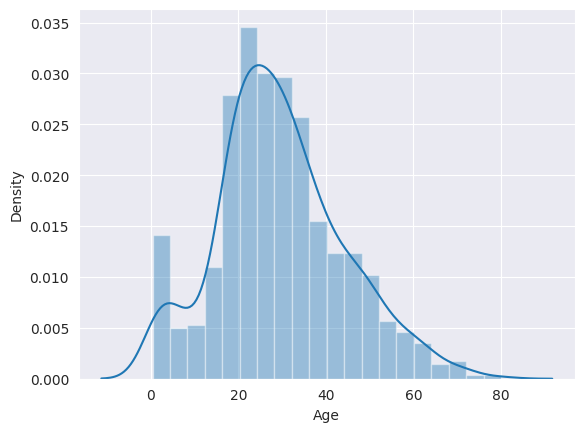

In [165]:
#Missing value handling data age
sns.distplot(df['Age'])

Berdasarkan grafik data terlihat bahwa data tidak berdistribusi normal sehingga missing data pada kolom age dapat diisi dengan median dengan code `df['Age']=df['Age].fillna(df['Age'].median())` dimana fillna(df['Age'].median() merupakan fungsi untuk melakukan pengisian data dengan median dari data 'Age'

In [166]:
#Karena data normal bisa diisi dengan mean
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

3.   Cabin
> Missing value pada kolom 'Cabin' akan diselesaikan dengan menghapus seluruh kolom Cabin dengan code `df=df.drop('Cabin' , axis=1)` dimana `df.drop` adalah fungsi untuk menghapus suatu value dan ('Cabin' , axis=1) menunjukan kolom yang ingin dihapus dan axis=1 menandakan seluruh kolom yang dihapus. Hal ini dilakukan karena jumlah missing value pada kolom Cabin yang terlalu banyak dan akan kurang efisien apabila diisi dengan mean/median/modus karena akan menimbulkan bias data.




In [167]:
#Missing value handling pada data Cabin
df=df.drop('Cabin',axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [168]:
#Menampilkan data yang telah di cleansing 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## **Encoding Data**



Encoding data akan dilakukan pada kolom 'Sex' dan 'Embarked' karena masih bertipe string atau object.


1.   Sex
> Pada kolom Sex akan dilakukan encoding data dengan metode label encoding dimana female = 0 dan male = 1 dengan code `df['Sex']=df['Sex'].astype('category').cat.codes` dimana df['Sex'] adalah kolom yang dipilih untuk pengkategorian data.

2.   Embarked
> Pada kolom Embarked karena memiliki lebih dari 2 unik data maka bisa menggunakan metode frequency encoding untuk meminimalisir terjadinya spare data. Code frequency encoding adalah 

> `namafreq = namadataframe['namakolom'].value_counts().reset_index()`

> `namafreq.rename(columns={"index": "namakolom", "namakolom": "freq_namakolom"}, inplace = True)`

> `namafreq['pct_namakolom'] = round((namafreq['freq_namakolom']/namafreq['freq_namakolom'].sum())*100,2)`

> `namadataframe = namadataframe.merge(namafreq[['namakolom','pct_namakolom']], on='namakolom', how='inner')`












In [169]:
#Sex
df['Sex']=df['Sex'].astype('category').cat.codes

#Embarked
freq_et = df['Embarked'].value_counts().reset_index()
freq_et.rename(columns={"index": "Embarked", "Embarked": "freq_Embarked"}, inplace = True)
freq_et['pct_Embarked'] = round((freq_et['freq_Embarked']/freq_et['freq_Embarked'].sum())*100,2)
df = df.merge(freq_et[['Embarked','pct_Embarked']], on='Embarked', how='inner')

In [170]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pct_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,72.44
1,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,72.44
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,72.44
3,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,72.44
4,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S,72.44


## **Outlier**



Deteksi outlier akan dilakukan pada data integer dan float non kategorical dimana dalam dataframe terdapat 4 kolom data yang perlu dicek outliernnya, yaitu Age, SibSp, Parch, dan Fare. Code untuk mendeteksi outlier pada keempat kolom data tersebut, yaitu :
> `f,ax = plt.subplots(panjang axis,figsize=(panjang,lebar))`

> `g = sns.distplot(df['namakolom'],kde=True, ax=ax[koordinat axis])` #untuk membuat plot

> `ax[0,0].set_title('namakolom - Original')` #untuk memberikan judul pada grafik distribusi

> `ax[0,0].set_xlabel('')` #untuk memberi nama sumbu x

> `g = sns.boxplot(df['namakolom'],color='warna grafik',orient='h', ax=ax[koordinat grafik])` #untuk membuat boxplot

> `ax[0,1].set_title('nama kolom - Original')` #untuk memberikan judul pada boxplot

> `ax[0,1].set_xlabel('')`#untuk memberi nama sumbu x

Dimana sns.boxplot yaitu untuk membentuk boxplot dengan bantuan library seaborn dan orient='h' untuk menentukan orientasi boxplotnya disini 'h' bermakna diposisikan secara horizontal.

Text(0.5, 0, '')

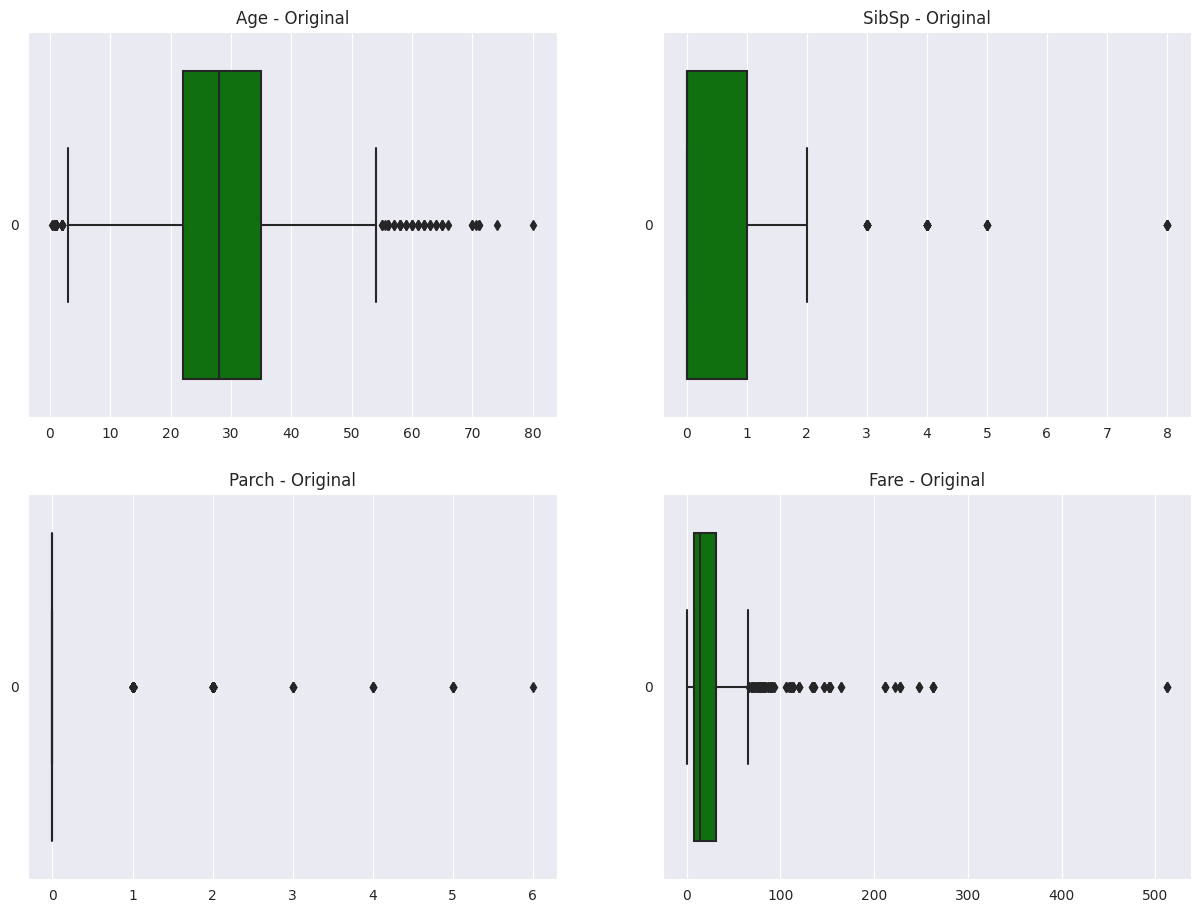

In [171]:
f,ax = plt.subplots(2,2,figsize=(15,11))

g = sns.boxplot(df['Age'],color='green',orient='h', ax=ax[0,0])
ax[0,0].set_title('Age - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['SibSp'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('SibSp - Original')
ax[0,1].set_xlabel('')

g = sns.boxplot(df['Parch'],color='green',orient='h', ax=ax[1,0])
ax[1,0].set_title('Parch - Original')
ax[1,1].set_xlabel('')

g = sns.boxplot(df['Fare'],color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare - Original')
ax[1,1].set_xlabel('')

Berdasarkan boxplot diatas terlihat bahwa kolom data Age, SibSp, Parch, dan Fare memiliki nilai outlier maka perlu dilakukan outlier handling dengan metode transformasi.

Text(0.5, 0, '')

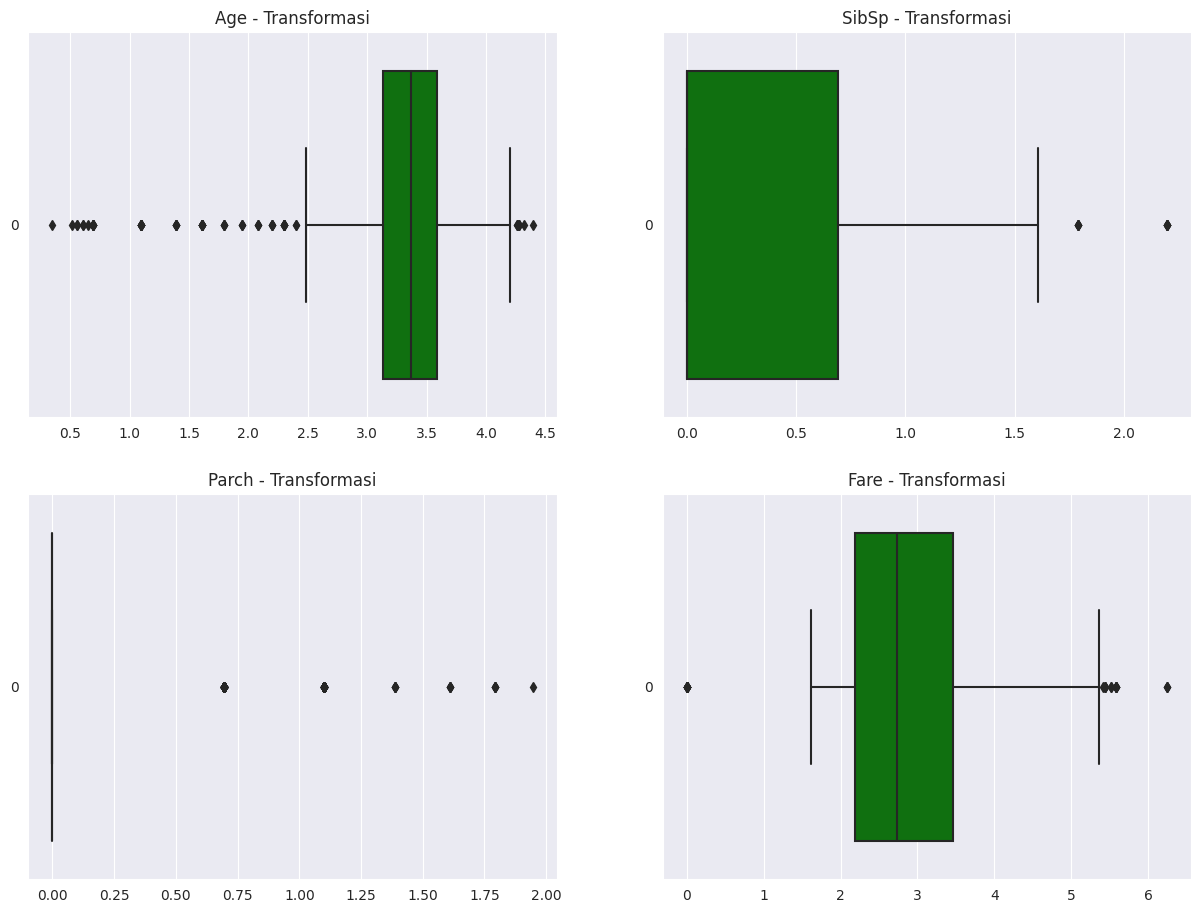

In [172]:
f,ax = plt.subplots(2,2,figsize=(15,11))

g = sns.boxplot(np.log(df['Age']+1),color='green',orient='h', ax=ax[0,0])
ax[0,0].set_title('Age - Transformasi')
ax[0,0].set_xlabel('')

g = sns.boxplot(np.log(df['SibSp']+1),color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('SibSp - Transformasi')
ax[0,1].set_xlabel('')

g = sns.boxplot(np.log(df['Parch']+1),color='green',orient='h', ax=ax[1,0])
ax[1,0].set_title('Parch - Transformasi')
ax[1,1].set_xlabel('')

g = sns.boxplot(np.log(df['Fare']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare - Transformasi')
ax[1,1].set_xlabel('')

Setelah dilakukan outlier handling ternyata keempat data tersebut masih memilki outlier walaupun jumlahnnya berkurang dari yang sebelumnnya

# Visualisasi

Akan ditampilkan data yang telah melalui proses cleansing dengan code `df.head()`

In [173]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pct_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,72.44
1,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,72.44
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,72.44
3,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,72.44
4,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S,72.44


Akan ditampilkan informasi terkait data yang telah melalui proses cleansing dengan code `df.info()`

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    int8   
 5   Age           889 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Embarked      889 non-null    object 
 11  pct_Embarked  889 non-null    float64
dtypes: float64(3), int64(5), int8(1), object(3)
memory usage: 116.5+ KB


Berdasarkan informasi di atas terlihat bahwa seluruh variabel sudah tidak mengandung missing value dan telah melalui proses encoding.

## Barplot


### 1.   Variabel Sex



*   Plot perbandingan jumlah penumpang laki-laki dan perempuan kapal titanic


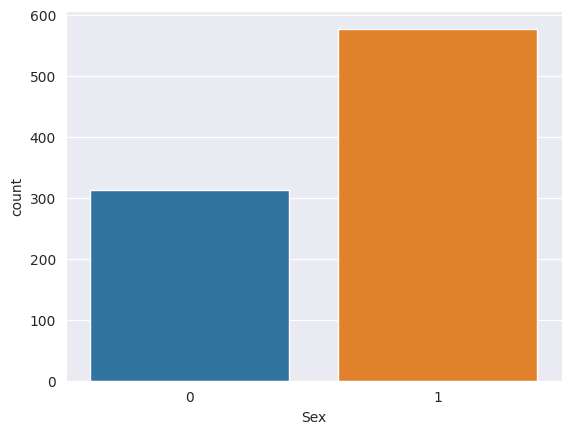

In [175]:
sns.set_style('darkgrid') #digunakan untuk menentukan gaya plot yang digunakan yaitu 'darkgrid'
sns.countplot(x='Sex',data=df) #fungsi library seaborn untuk membuat plot jumlah dari variabel Sex dalam dataframe 'df'
plt.show() #perintah untuk menampilkan plot

Diketahui bahwa 0 = perempuan dan 1 = laki-laki

Berdasarkan plot di atas terlihat bahwa jumlah penumpang laki-laki sebanyak 500an dan jumlah penumpang perempuan sebanyak 30oan. Hal ini menandakan bahwa penumpang laki-laki lebih banyak dibandingkan jumlah penumpang perempuan di kapal titanic.

*   Plot tingkat keselamatan penumpang perempuan dan laki-laki




<Axes: xlabel='Survived', ylabel='Sex'>

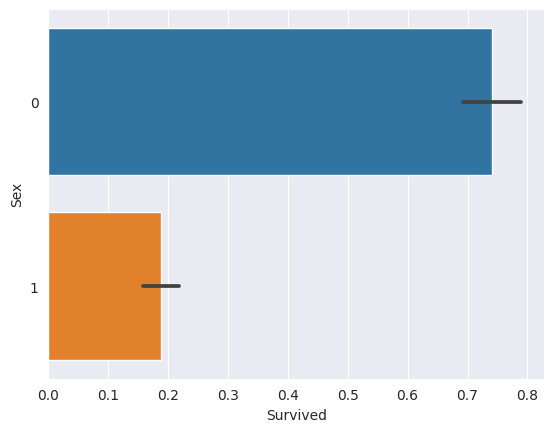

In [176]:
#digunakan library seaborn dengan jenis barplot pada dataframe 'df', sumbu x=menunjukan tingkat keselamatan, sumbu y menunjukan jenis kelamin, dan orient 'h' menunjukan posisi horizontal
sns.barplot(data=df,x="Survived",y="Sex",orient='h')

Berdasarkan plot di atas terlihat bahwa tingkat keselamatan penumpang perempuan lebih tinggi dibandingkan penumpang laki-laki dengan tingkat keselamatan mencapai 0.7an. Sedangkan, tingkat keselamatan laki-laki hanya berkisar 0.1an

### 2. Variabel Pclass

* Plot perbandingan jumlah penumpang titanic setiap kelas



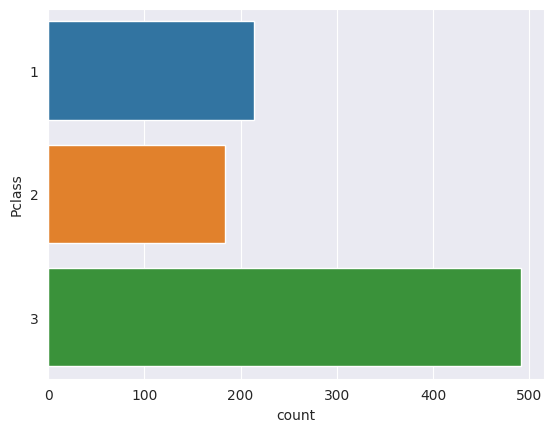

In [177]:
sns.set_style('darkgrid') #digunakan untuk menentukan gaya plot yang digunakan yaitu 'darkgrid'
sns.countplot(y='Pclass',data=df) #fungsi library seaborn untuk membuat plot jumlah dari variabel Pclass dalam dataframe 'df'
plt.show() #untuk menampilkan plot

Berdasarkan plot di atas jumlah penumpang dari kelas 1 sebanyak 200an penumpang, kelas 2 sebanyak 100an penumpang, dan kelas 3 sebanyak 400an penumpang. Hal ini menandakan bahwa jumlah penumpang terbanyak berada di kelas 3

*   Plot tingkat keselamatan penumpang titanic berdasarkan asal




<Axes: xlabel='Pclass', ylabel='Survived'>

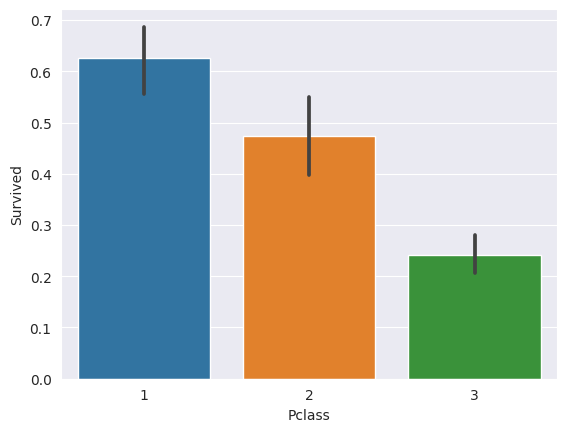

In [178]:
#digunakan library seaborn dengan jenis barplot pada dataframe 'df', sumbu x=menunjukan kelas, sumbu y menunjukan tingkat keselamatan
sns.barplot(data=df,x="Pclass",y="Survived")

Berdasarkan plot di atas terlihat bahwa penumpang yang berada di kelas 1 memiliki tingkat keselamatan yang lebih tinggi sebesar 0.6 lebih dibandingkan penumpang yang berada di kelas 2 dan 1.

*   Plot tingkat keselamatan penumpang laki-laki dan perempuan berdasarkan asal


<Axes: xlabel='Survived', ylabel='Pclass'>

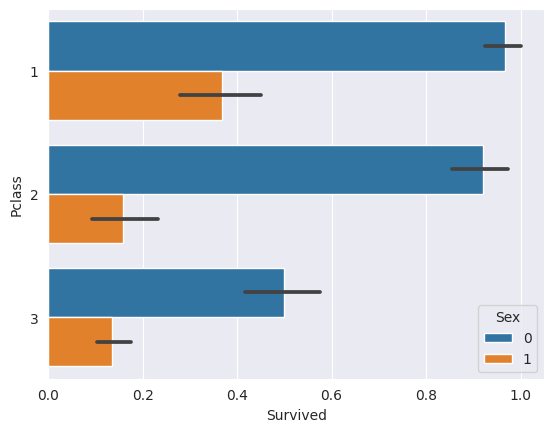

In [179]:
#digunakan library seaborn dengan jenis barplot pada dataframe 'df', sumbu x=menunjukan tingkat keselamatan, sumbu y menunjukan kelas, orient 'h' menunjukan posisi horizontal, dan hue='Sex' menandakan akan ditampilkan untuk setiap jenis kelamin
sns.barplot(data=df,x="Survived",y="Pclass",orient="h",hue="Sex")

Berdasarkan plot di atas terlihat bahwa kelas 1 memiliki keselamatan yang lebih tinggi dibandingkan kelas 2 dan 1 berdasarkan jenis kelamin dimana tingkat keselamatan perempuan yang berada di kelas 1 bernilai 0.8 lebih dan perempuan bernilai 0.2 lebih.

### 3. Variabel Embarked

*   Plot perbandingan jumlah penumpang titanic berdasarkan asal 




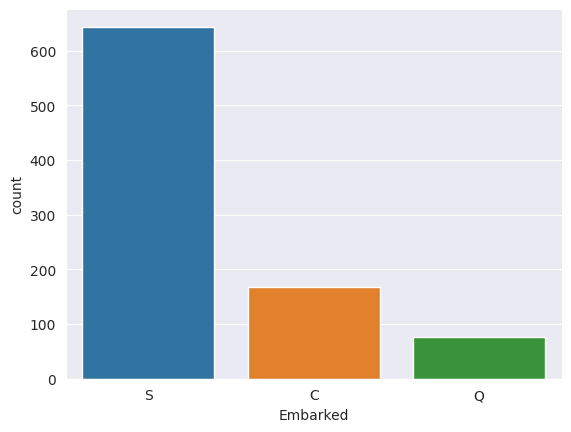

In [180]:
sns.set_style('darkgrid') #digunakan untuk menentukan gaya plot yang digunakan yaitu 'darkgrid'
sns.countplot(x='Embarked',data=df) #fungsi library seaborn untuk membuat plot jumlah dari variabel Embarked dalam dataframe 'df'
plt.show() #perintah untuk menampilkan plot

Diketahui bahwa S=Southampton, C=Cherbourg, Q=Queenstwon

Berdasarkan plot di atas terlihat bahwa jumlah penumpang terbanyakan adalah penumpang yang berasal dari Southgampton sebanyak 600 lebih penumpang jika dibandingkan dengan penumpang yang berasal dari Cherbourg dan Queenstwon.

*   Plot tingkat keselamatan penumpang berdasarkan asal



<Axes: xlabel='Embarked', ylabel='Survived'>

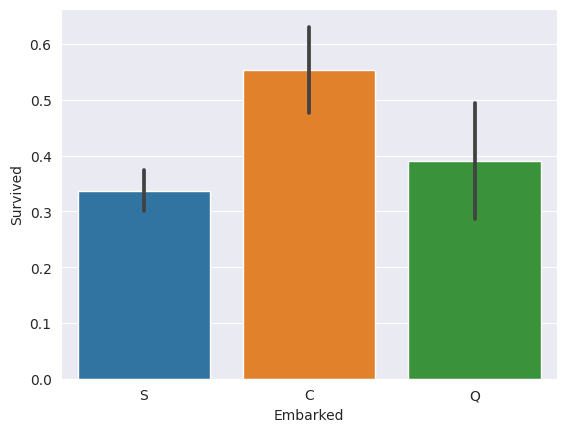

In [181]:
#digunakan library seaborn dengan jenis barplot pada dataframe 'df', sumbu x=menunjukan asal, sumbu y menunjukan tingkat keselamatan
sns.barplot(data=df,x="Embarked",y="Survived")

Berdasarkan plot di atas terlihat bahwa tingkat keselamatan penumpang yang berasal dari Cherbrough memiliki tingkat keselamatan tertinggi sebesar 0.5 lebih dibandingkan dengan penumpang yang berasal dari Southampton dan Queenstwon.

*   Plot tingkat keselamatan penumpang dari setiap kelas berdasarkan asal




<Axes: xlabel='Survived', ylabel='Embarked'>

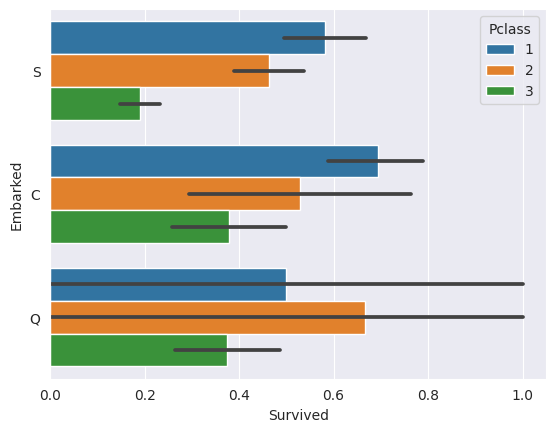

In [182]:
#digunakan library seaborn dengan jenis barplot pada dataframe 'df', sumbu x=menunjukan tingkat keselamatan, sumbu y menunjukan asal(Embarked), orient 'h' menunjukan posisi horizontal, dan hue='Pclass' menandakan akan ditampilkan untuk setiap kelas
sns.barplot(data=df,x="Survived",y="Embarked",hue="Pclass")

Berdasarkan plot di atas terlihat bahwa 


*   penumpang kelas 1 yang berasal dari Cherbrough memiliki keselamatan yang lebih tinggi dibandingkan penumpang kelas 1 yang berasal dari Shouthampton dan Queenstwon
*   penumpang kelas 2 yang berasal dari Queenstwon memiliki keselamatan yang lebih tinggi dibandingkan penumpang kelas 2 yang berasal dari Shouthampton dan Cherbrough
*   penumpang kelas 3 yang berasal dari Cherbrough memiliki keselamatan yang lebih tinggi dibandingkan penumpang kelas 3 yang berasal dari Shouthampton dan Queenstwon

### 4. Variabel Survived



*   Plot perbandingan jumlah penumpang yang selamat dan tidak selamat



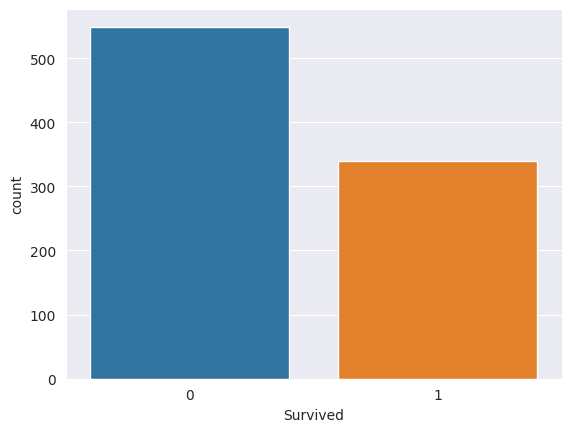

In [183]:
sns.set_style('darkgrid') #digunakan untuk menentukan gaya plot yang digunakan yaitu 'darkgrid'
sns.countplot(x='Survived',data=df) #fungsi library seaborn untuk membuat plot jumlah dari variabel SUrvived dalam dataframe 'df'
plt.show() #perintah untuk menampilkan plot

Berdasarkan plot di atas jumlah penumpang yang tidak selamat pada peristiwa titanic lebih banyak daripada penumpang yang selamat. Penumpang yang tidak selamat berjumlah 500 penumpang lebih sedangkan penumpang yang selamat berkisar 300-an orang.

## Distplot

### 1. Variabel Age

*   Distribusi plot umur penumpang titanic




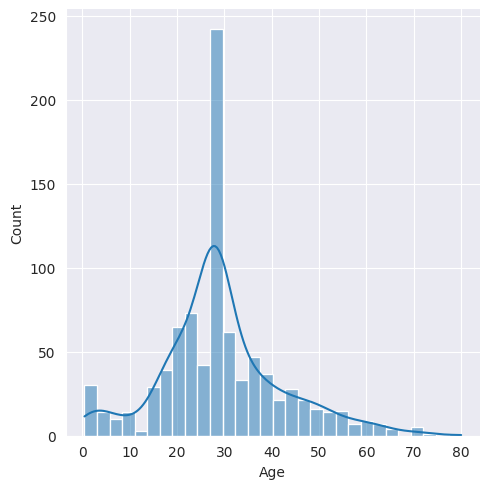

In [184]:
#digunakan library seaborn untuk melihat grafik distribusi pada kolom umur pada dataframe 'df'
sns.displot(data=df['Age'], kde=True)

Berdasarkan plot di atas terlihat bahwa usia penumpang kapal titanic beragam dan paling banyak adalah penumpang dengan usia sekitar 30 tahun. Berdasarkan grafik terlihat bahwa grafik tidak menyerupai grafik distribusi normal sehingga data tidak berdistribusi normal.

### 2. Variabel Fare

*   Distribusi plot harga transportasi penumpang titanic



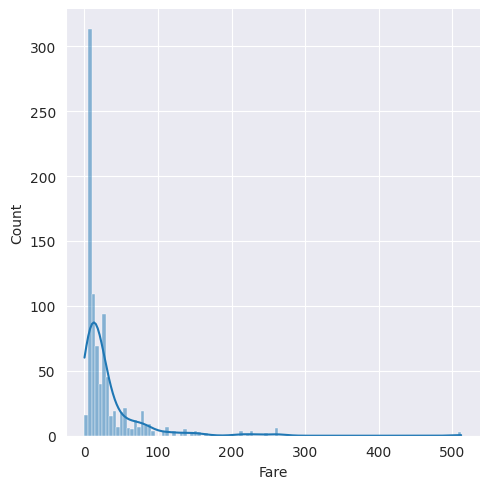

In [185]:
#digunakan library seaborn untuk melihat grafik distribusi pada kolom Fare pada dataframe 'df'
sns.displot(data=df['Fare'],kde=True)

Berdasarkan plot di atas terlihat bahwa harga tiket penumpang kapal titanic beragam dan paling banyak adalah tiket dengan harga dibawah 100. Berdasarkan grafik terlihat bahwa grafik tidak menyerupai grafik distribusi normal karena memiliki kemiringan (skewness).

### 3. Variabel SibSp



*   Distribusi plot jumlah saudara yang dimiliki penumpang kapal titanic



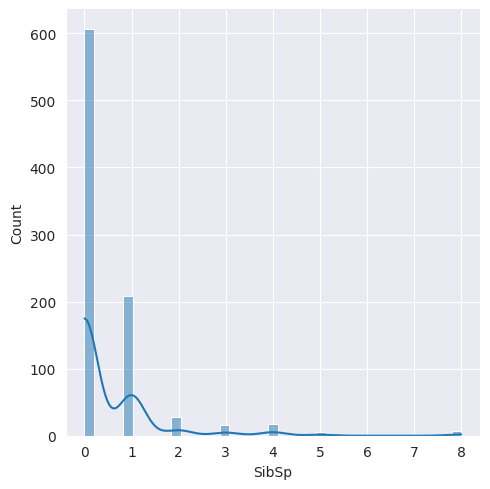

In [186]:
#digunakan library seaborn untuk melihat grafik distribusi pada kolom SibSp pada dataframe 'df'
sns.displot(data=df['SibSp'],kde=True)

Berdasarkan plot di atas terlihat bahwa jumlah saudara penumpang kapal titanic tidak beragam dan kebanyakan tidak memilki saudara. Berdasarkan grafik terlihat bahwa grafik tidak menyerupai grafik distribusi normal karena memiliki kemiringan (skewness) sehingga data tidak berdistribusi normal.

### 4. Variabel Parch



*  Distribusi plot keluarga pendamping penumpang kapal titanic



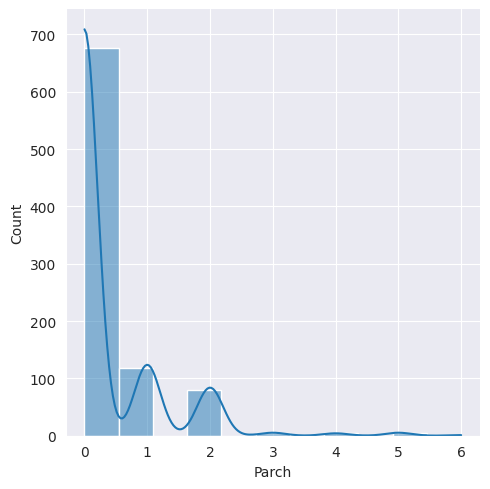

In [187]:
#digunakan library seaborn untuk melihat grafik distribusi pada kolom Parch pada dataframe 'df'
sns.displot(data=df['Parch'],kde=True)

Berdasarkan plot di atas terlihat bahwa jumlah anak atau orang tua yang menemani penumpang kapal titanic tidak beragam dan kebanyakan tidak memilki pendamping. Berdasarkan grafik terlihat bahwa grafik tidak menyerupai grafik distribusi normal karena memiliki kemiringan (skewness) sehingga data tidak berdistribusi normal.

## Boxplot

### 1. Variabel Age

*   Boxplot umur penumpang titanic




<Axes: >

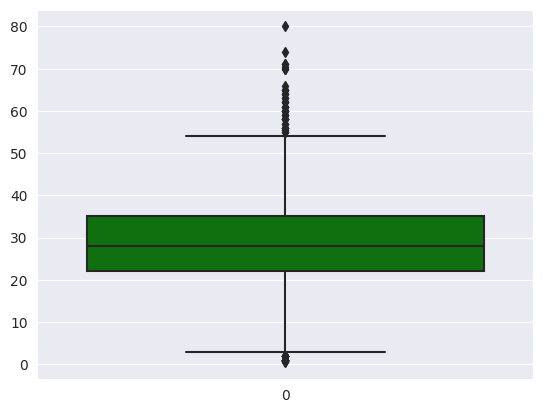

In [188]:
#digunakan library seaborn dengan jenis boxplot dimana data yang digunakan adalah kolom 'Age' pada dataframe df dan warna boxplot hijau
sns.boxplot(data=df['Age'],color='green')

Berdasarkan boxplot di atas terlihat bahwa frekuensi tertinggi usia penumpang berada pada kisaran usia 20 hingga 30 tahun. Data tidak berdistribusi normal karena memiliki kecenderungan right skewness yang ditandai dengan whisker yang lebih tinggi pada bagian atas. Terlihat juga bahwa data memiliki banyak outlier pada rentang usia tua.

### 2. Variabel SibSp



*   Boxplot jumlah saudara penumpang titanic



<Axes: >

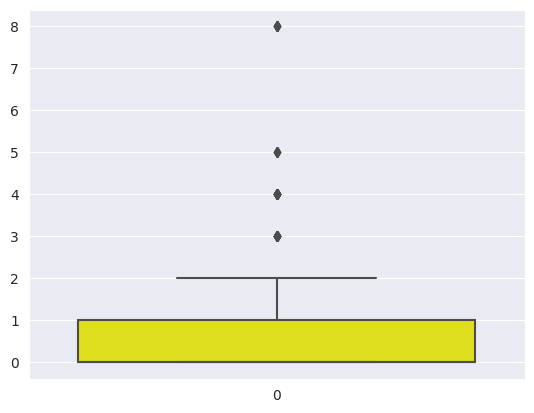

In [189]:
#digunakan library seaborn dengan jenis boxplot dimana data yang digunakan adalah kolom 'SibSp' pada dataframe df dan warna boxplot kuning
sns.boxplot(data=df['SibSp'],color='yellow')

Berdasarkan boxplot di atas terlihat bahwa frekuensi tertinggi jumlah saudara berada pada kisaran 0 hingga 1 saudara yang dimiliki. Terlihat juga bahwa data memiliki banyak outlier diatas batas maksimum.

### 3. Variabel Parch



*   Boxplot anggota yang menemani penumpang titanic



<Axes: >

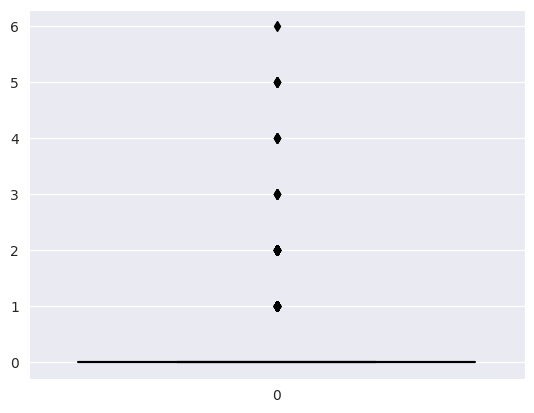

In [190]:
#digunakan library seaborn dengan jenis boxplot dimana data yang digunakan adalah kolom 'Parch' pada dataframe df dan warna boxplot hitam
sns.boxplot(data=df['Parch'],color='black')

Berdasarkan boxplot di atas terlihat bahwa kebanyakan penumpang menaiki kapal titanic sendiri tanpa ditemani anak atau orang tua.

### 4. Variabel Fare



*   Boxplot harga transportasi penumpang titanic


<Axes: >

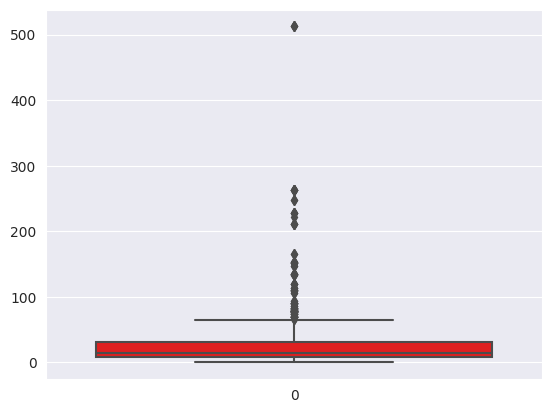

In [191]:
#digunakan library seaborn dengan jenis boxplot dimana data yang digunakan adalah kolom 'Fare' pada dataframe df dan warna boxplot merah
sns.boxplot(data=df['Fare'],color='red')

Berdasarkan boxplot di atas terlihat bahwa frekuensi tertinggi harga tiket yang dibayarkan berada pada kisaran dibawah 50. Data tidak berdistribusi normal karena memiliki kecenderungan right skewness yang ditandai dengan whisker yang lebih tinggi pada bagian atas. Terlihat juga bahwa data memiliki banyak outlier pada harga tiket yang lebih mahal.

## Scatterplot



*   Scatterplot atau hubungan umur dan harga transportasi berdasarkan survived



<Axes: xlabel='Fare', ylabel='Age'>

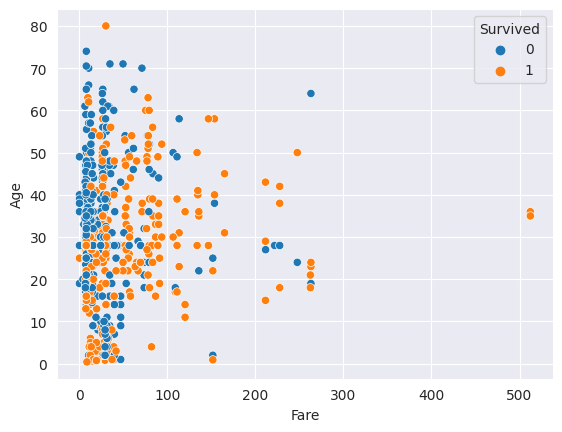

In [192]:
#digunakan library seaborn dengan jenis scatterplot pada dataframe 'df', sumbu x=menunjukan fare, sumbu y menunjukan umur, dan hue='Survived' menandakan akan ditampilkan untuk setiap kategori
sns.scatterplot(data=df,x='Fare',y='Age',hue='Survived')

Keterangan : 0 = Not Survived dan 1 = Survived

Berdasaran scatterplot di atas dapat dilihat plot - plot data tersebar acak/ tidak terlihat membentuk pola tertentu. Hal tersebut menunjukkan bahwa tidak ada korelasi antara variabel Age dengan Variabel Fare dari segi keselamatan penumpang.

## Pie Chart

### 1. Variabel Sex



*   Pie chart jumlah penumpang laki-laki dan perempuan titanic



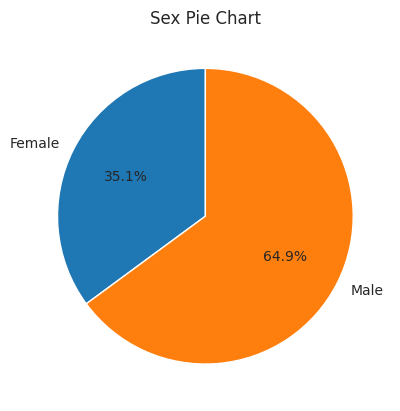

In [193]:
# Menghitung jumlah penumpang 'Female' dan 'Male' pada dataframe df dengan fungsi len()
female_count = len(df[df['Sex'] == 0]) #menghitung jumlah penumpang perempuan
male_count = len(df[df['Sex'] == 1]) #menghitung jumlah penumpang laki-laki

# Membuat Pie Chart variabel Sex
labels = ['Female', 'Male'] #untuk memberikan label disetiap bagian pie chart
sizes = [female_count, male_count] #ukuran chart sesuai dengan jumlah penumpang berdasarkan jenis kelamin
fig1, ax1 = plt.subplots() #menandakan subplot yang terdiri dari pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) #membentuk pie chart dengan sizes, nama label, dan posisi chart diputar 90 derajat dari posisi awal
ax1.set_title('Sex Pie Chart') #untuk memberikan judul pada pie chart

# Menampilkan Pie Chart variabel Sex
plt.show() 

Berdasarkan pie chart di atas dapat dilihat bahwa banyaknya penumpang laki-laki sebanyak 64.9% kemudian perempuan sebanyak 35.1%

### 2. Variabel Pclass



*   Pie chart jumlah penumpang titanic berdasarkan kelas tiket



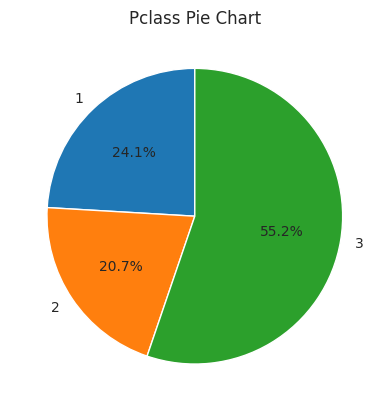

In [194]:
# Menghitung jumlah penumpang yang berasal dari kelas 1,2, dan 3 pada dataframe df dengan fungsi len()
satu_count = len(df[df['Pclass'] == 1]) #menghitung jumlah penumpang yang berasal dari kelas 1
dua_count = len(df[df['Pclass'] == 2]) #menghitung jumlah penumpang yang berasal dari kelas 2
tiga_count = len(df[df['Pclass'] == 3]) #menghitung jumlah penumpang yang berasal dari kelas 3

# Membuat Pie Chart variabel Pclass
labels = ['1', '2','3'] #untuk memberikan label disetiap bagian pie chart
sizes = [satu_count, dua_count,tiga_count] #ukuran chart sesuai dengan jumlah penumpang berdasarkan kelas
fig1, ax1 = plt.subplots() #menandakan subplot yang terdiri dari pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) #membentuk pie chart dengan sizes, nama label, dan posisi chart diputar 90 derajat dari posisi awal
ax1.set_title('Pclass Pie Chart') #untuk memberikan judul pada pie chart

# Menampilkan Pie Chart variabel Pclass
plt.show()

Berdasarkan pie chart di atas dapat dilihat bahwa banyaknya penumpang yang berasal dari kelas 1 sebanyak 24.1% kemudian kelas 2 sebanyak 20.7%, dan kelas 3 sebanyak 55.2%

### 3. Variabel Embarked



*   Pie chart jumlah penumpang titanic berdasarkan asal



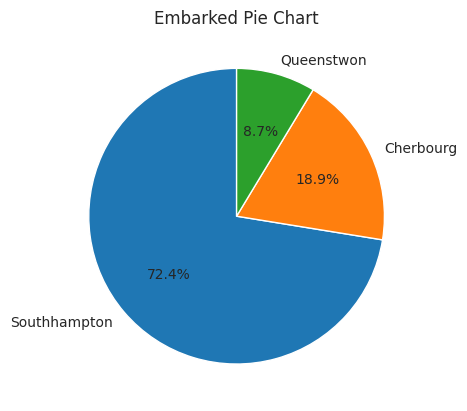

In [195]:
# Menghitung jumlah penumpang yang berasal dari 'Southampton','Cherbourg',dan 'Queenstwon' pada dataframe df dengan fungsi len()
S_count = len(df[df['Embarked'] == 'S']) #menghitung jumlah penumpang yang berasal dari Southampton
C_count = len(df[df['Embarked'] == 'C']) #menghitung jumlah penumpang yang berasal dari cherbourg
Q_count = len(df[df['Embarked'] == 'Q']) #menghitung jumlah penumpang yang berasal dari Queenstwon

# Membuat Pie Chart variabel Embarked
labels = ['Southhampton', 'Cherbourg','Queenstwon'] #untuk memberikan label disetiap bagian pie chart
sizes = [S_count, C_count,Q_count] #ukuran chart sesuai dengan jumlah penumpang berdasarkan asal
fig1, ax1 = plt.subplots() #menandakan subplot yang terdiri dari pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) #membentuk pie chart dengan sizes, nama label, dan posisi chart diputar 90 derajat dari posisi awal
ax1.set_title('Embarked Pie Chart') #untuk memberikan judul pada pie chart

# Menampilkan Pie Chart variabel Embarked
plt.show()

Berdasarkan pie chart di atas dapat dilihat bahwa banyaknya penumpang yang berasal dari Southampton sebanyak 72.4% kemudian Cherbourg sebanyak 18.9%, dan Queenstwon sebanyak 8.7%

### 4. Variabel Survived



*   Pie chart jumlah penumpang yang selamat dan tidak selamat


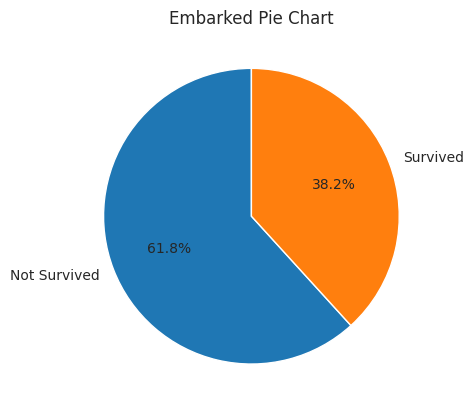

In [196]:
# Menghitung jumlah penumpang yang 'Not Survived' dan 'Survived' pada dataframe df dengan fungsi len()
notsurvived_count = len(df[df['Survived'] == 0]) #menghitung jumlah penumpang yang tidak selamat
survived_count = len(df[df['Survived'] == 1]) #menghitung jumlah penumpang yang selamat

# Membuat Pie Chart variabel Survived
labels = ['Not Survived','Survived'] #untuk memberikan label disetiap bagian pie chart
sizes = [notsurvived_count, survived_count] #ukuran chart sesuai dengan jumlah penumpang berdasarkan keselamatan
fig1, ax1 = plt.subplots() #menandakan subplot yang terdiri dari pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) #membentuk pie chart dengan sizes, nama label, dan posisi chart diputar 90 derajat dari posisi awal
ax1.set_title('Embarked Pie Chart') #untuk memberikan judul pada pie chart

# Menampilkan Pie Chart variabel Survived
plt.show()

Berdasarkan pie chart di atas terlihat bahwa presentase penumpang yang tidak selamat lebih banyak yaitu 61.8% jika dibandingkan dengan penumpang yang selamat sebesar 38.2%